In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [89]:
file = open(r'WhatsApp Chat with CSE 4th Year 2020-24.txt', 'r')
data = file.read()

In [90]:
data

'12/08/23, 09:01 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n21/08/23, 13:51 - Ajmer Sir CSE Dcrust: <Media omitted>\n22/08/23, 15:05 - Ajmer Sir CSE Dcrust: Dear Students\n\n \n\nIt\'s a pleasure to announce that the 3D Printing and Idea Lab club – “KHOZ 3D”, is opening invitations for the students of our University to join the club. Our club will be prestigious and will work for the various diverse activities/events and competitions of the 3D Printing and Idea lab. Different Teams will be formed in this club; few such teams are mentioned in the application form (Google Form).\n\n \n\nI request all interested students to fill out the attached Google Form to join this “KHOZ 3D” club latest by 27th August 2023. Please click the link given below to fill out the form:\n\n \n\nhttps://forms.gle/QgrxY9N8KBkcLJ3z8\n\n \n\nPlease contact Mr. Sumit (M:9671650937) and Dr. Pardeep Sharma (M:9729660

In [91]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [92]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Ajmer Sir CSE Dcrust: <Media omitted>\n',
 "Ajmer Sir CSE Dcrust: Dear Students\n\n \n\nIt's a pleasure to announce that the 3D Printing and Idea Lab club – “KHOZ 3D”, is opening invitations for the students of our University to join the club. Our club will be prestigious and will work for the various diverse activities/events and competitions of the 3D Printing and Idea lab. Different Teams will be formed in this club; few such teams are mentioned in the application form (Google Form).\n\n \n\nI request all interested students to fill out the attached Google Form to join this “KHOZ 3D” club latest by 27th August 2023. Please click the link given below to fill out the form:\n\n \n\nhttps://forms.gle/QgrxY9N8KBkcLJ3z8\n\n \n\nPlease contact Mr. Sumit (M:9671650937) and Dr. Pardeep Sharma (M:9729660266) for any query or clarification.\n",
 'A

In [93]:
dates = re.findall(pattern, data)
dates

['12/08/23, 09:01 - ',
 '21/08/23, 13:51 - ',
 '22/08/23, 15:05 - ',
 '23/08/23, 12:29 - ',
 '23/08/23, 12:59 - ',
 '23/08/23, 13:02 - ',
 '23/08/23, 13:02 - ',
 '23/08/23, 13:05 - ',
 '23/08/23, 13:05 - ',
 '23/08/23, 13:09 - ',
 '23/08/23, 13:09 - ',
 '23/08/23, 14:16 - ',
 '23/08/23, 15:46 - ',
 '23/08/23, 15:46 - ',
 '25/08/23, 19:48 - ',
 '25/08/23, 19:52 - ',
 '26/08/23, 10:47 - ',
 '29/08/23, 13:58 - ',
 '01/09/23, 11:42 - ',
 '01/09/23, 18:03 - ',
 '04/09/23, 09:29 - ',
 '04/09/23, 09:27 - ',
 '04/09/23, 09:28 - ',
 '04/09/23, 09:47 - ',
 '04/09/23, 09:48 - ',
 '04/09/23, 09:49 - ',
 '04/09/23, 10:02 - ',
 '04/09/23, 10:09 - ',
 '04/09/23, 10:09 - ',
 '04/09/23, 10:10 - ',
 '04/09/23, 10:14 - ',
 '04/09/23, 10:20 - ',
 '04/09/23, 10:33 - ',
 '04/09/23, 10:59 - ',
 '04/09/23, 10:59 - ',
 '04/09/23, 11:19 - ',
 '04/09/23, 11:39 - ',
 '04/09/23, 14:11 - ',
 '05/09/23, 15:35 - ',
 '07/09/23, 12:03 - ',
 '07/09/23, 12:03 - ',
 '07/09/23, 12:08 - ',
 '08/09/23, 16:10 - ',
 '08/09/23,

In [94]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_data': 'date'}, inplace = True)
df

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2023-08-12 09:01:00
1,Ajmer Sir CSE Dcrust: <Media omitted>\n,2023-08-21 13:51:00
2,Ajmer Sir CSE Dcrust: Dear Students\n\n \n\nIt...,2023-08-22 15:05:00
3,Ajmer Sir CSE Dcrust: <Media omitted>\n,2023-08-23 12:29:00
4,Ajmer Sir CSE Dcrust: If anyone is not in the ...,2023-08-23 12:59:00
...,...,...
145,Rahul CSE Dcrust: https://careers.qualcomm.com...,2023-10-02 20:44:00
146,Rahul CSE Dcrust: https://careers.mastercard.c...,2023-10-02 20:44:00
147,+91 89302 20999: It is intimated that the proc...,2023-10-03 11:45:00
148,+91 89302 20999: <Media omitted>\n,2023-10-03 11:45:00


In [95]:
df.shape

(150, 2)

In [96]:
users = []
messages = []
for message in df['user_message']:
#     entry = re.split('\+\d{2} \d{5} \d{5}: \*', message)
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('Group_Notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages

In [97]:
df

,user_message,message_date,user,message
0,Messages and calls are end-to-end encrypted. N...,2023-08-12 09:01:00,Group_Notification,Messages and calls are end-to-end encrypted. N...
1,Ajmer Sir CSE Dcrust: <Media omitted>\n,2023-08-21 13:51:00,Ajmer Sir CSE Dcrust,<Media omitted>\n
2,Ajmer Sir CSE Dcrust: Dear Students\n\n \n\nIt...,2023-08-22 15:05:00,Ajmer Sir CSE Dcrust,
3,Ajmer Sir CSE Dcrust: <Media omitted>\n,2023-08-23 12:29:00,Ajmer Sir CSE Dcrust,<Media omitted>\n
4,Ajmer Sir CSE Dcrust: If anyone is not in the ...,2023-08-23 12:59:00,Ajmer Sir CSE Dcrust,"If anyone is not in the list, let me know toda..."
...,...,...,...,...
145,Rahul CSE Dcrust: https://careers.qualcomm.com...,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.qualcomm.com/careers/job/44669...
146,Rahul CSE Dcrust: https://careers.mastercard.c...,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.mastercard.com/us/en/job/MASRU...
147,+91 89302 20999: It is intimated that the proc...,2023-10-03 11:45:00,+91 89302 20999,It is intimated that the process to apply for ...
148,+91 89302 20999: <Media omitted>\n,2023-10-03 11:45:00,+91 89302 20999,<Media omitted>\n


In [98]:
df.drop(columns=['user_message'], inplace=True)

In [99]:
df

,message_date,user,message
0,2023-08-12 09:01:00,Group_Notification,Messages and calls are end-to-end encrypted. N...
1,2023-08-21 13:51:00,Ajmer Sir CSE Dcrust,<Media omitted>\n
2,2023-08-22 15:05:00,Ajmer Sir CSE Dcrust,
3,2023-08-23 12:29:00,Ajmer Sir CSE Dcrust,<Media omitted>\n
4,2023-08-23 12:59:00,Ajmer Sir CSE Dcrust,"If anyone is not in the list, let me know toda..."
...,...,...,...
145,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.qualcomm.com/careers/job/44669...
146,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.mastercard.com/us/en/job/MASRU...
147,2023-10-03 11:45:00,+91 89302 20999,It is intimated that the process to apply for ...
148,2023-10-03 11:45:00,+91 89302 20999,<Media omitted>\n


### Extracting columns

In [234]:
df['day'] = df['message_date'].dt.day
df['day_name'] = df['message_date'].dt.day_name()
df['month'] = df['message_date'].dt.month
df['month_name'] = df['message_date'].dt.month_name()
df['year'] = df['message_date'].dt.year
df['hour'] = df['message_date'].dt.hour
df['minute'] = df['message_date'].dt.minute

In [235]:
df.sample()

,message_date,user,message,day,month,year,hour,minute,day_name,month_name
64,2023-09-14 20:51:00,Ajmer Sir CSE Dcrust,??\n,14,9,2023,20,51,Thursday,September


In [102]:
df[df['user'] == 'Rahul CSE Dcrust'].shape

(23, 8)

In [103]:
# No of words
words = []
for msg in df['message']:
    words.extend(msg.split())

In [104]:
len(words)

1455

In [105]:
# Number of media
df[df['message'] == '<Media omitted>\n'].shape

(17, 8)

In [106]:
!pip install urlextract

In [107]:
from urlextract import URLExtract

extractor = URLExtract()

In [108]:
urls = df['message'].apply(lambda x: extractor.find_urls(x))

In [109]:
urls = [i for i in urls if i != []]

In [110]:
urls

[['https://unstop.com/competitions/accenture-innovation-challenge-2023-accenture-710576?lb=wjTONUm&utm_medium=Share&utm_source=shortUrl'],
 ['https://drive.google.com/file/d/1uqQ_07EVNzkhN-IlG6sR-n4cAx4HxP1w/view?usp=sharing'],
 ['https://unstop.com/o/04DiJRt?lb=wjTONUm&utm_medium=Share&utm_source=shortUrl'],
 ['https://www.linkedin.com/in/sunnygupta84'],
 ['https://topmate.io/sunny_gupta10'],
 ['https://docs.google.com/forms/d/e/1FAIpQLSe4vBuLZVYPK-9JNOmu88dlt8ZpgkqefWaEBZpp2IhMt8SECg/viewform?usp=sf_link'],
 ['https://stripe.com/jobs/listing/software-engineering-new-grad/5318703?gh_src=73vnei'],
 ['https://www.amazon.jobs/en/jobs/2439377/device-associate-mmpt?cmpid=JB_INOP301245B'],
 ['https://jobs.careers.microsoft.com/global/en/job/1625286/Software-Engineer'],
 ['https://careers.qualcomm.com/careers/job/446694481683'],
 ['https://careers.mastercard.com/us/en/job/MASRUSR204811EXTERNALENUS/']]

### Busiest Users

In [153]:
busy_user = df['user'].value_counts().head()
busy_user.index

Index(['Ajmer Sir CSE Dcrust', 'Rahul CSE Dcrust', 'Group_Notification',
       'Sagar CSE Dcrust 2', '+91 85293 91407'],
      dtype='object')

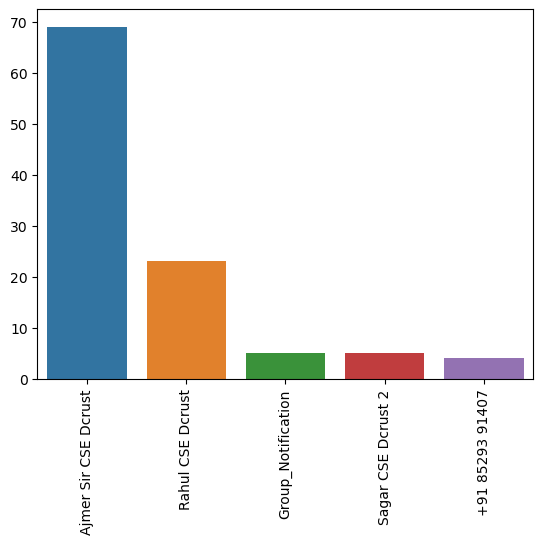

In [157]:
sns.barplot(x=busy_user.index, y=busy_user.values)
plt.xticks(rotation='vertical')
plt.show()

In [158]:
new_df = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})
new_df = new_df.head()
new_df

,name,percent
0,Ajmer Sir CSE Dcrust,46.00
1,Rahul CSE Dcrust,15.33
2,Group_Notification,3.33
3,Sagar CSE Dcrust 2,3.33
4,+91 85293 91407,2.67


<Axes: xlabel='name', ylabel='percent'>

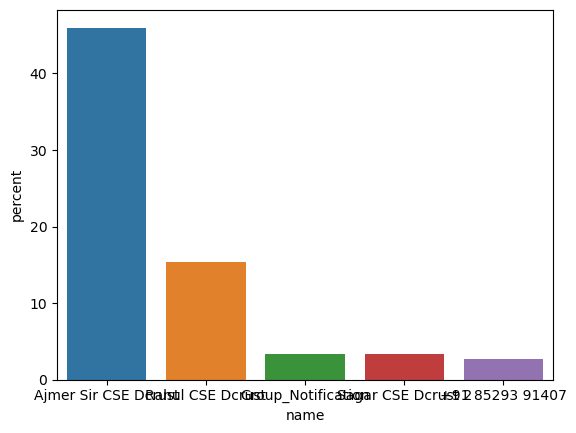

In [139]:
sns.barplot(data=new_df, x='name', y='percent')

### Max number of word

In [173]:
words = []
for w in df['message']:
    words.extend(w.split())
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'If',
 'anyone',
 'is',
 'not',
 'in',
 'the',
 'list,',
 'let',
 'me',
 'know',
 'today',
 'itself',
 'Shresth',
 'Mamchand',
 '20001001107',
 'partner',
 '-',
 'Mehak',
 'Saini',
 '20001001061',
 'Guide',
 'name',
 'Ajmer',
 'Singh',
 'Good',
 'afternoon',
 'sir,',
 'Umesh',
 '20001001120',
 'And',
 'Achal',
 '20001001002',
 'Dr.',
 'Kavita',
 'Rathi,',
 'guide',
 'name',
 'Jyoti',
 '20001001053',
 'Dr.',
 'Jitender',
 'is',
 'ur',
 'guide',
 'Lakshit',
 '21001001905',
 'Vikram',
 '20001001126',
 'Aman',
 '20001001004',
 'Jitender',
 'Sir',
 'is',
 'your',
 'guide',
 'Codeyoung',
 'online',
 'interview',
 'is',
 'expected',
 'to',
 'be',
 'tomorrow.',
 'Be',
 'ready.',
 'Google',
 'meet',
 'Link',
 '

In [179]:
# remove group notifications
# remove media omitted
# remove stop words

In [185]:
rm_grp_ntf = df[df['user'] != 'Group_Notification']
rm_grp_ntf = df[df['message'] != '<Media omitted>\n']
rm_grp_ntf

,message_date,user,message,day,month,year,hour,minute
0,2023-08-12 09:01:00,Group_Notification,Messages and calls are end-to-end encrypted. N...,12,8,2023,9,1
2,2023-08-22 15:05:00,Ajmer Sir CSE Dcrust,,22,8,2023,15,5
4,2023-08-23 12:59:00,Ajmer Sir CSE Dcrust,"If anyone is not in the list, let me know toda...",23,8,2023,12,59
5,2023-08-23 13:02:00,Ajmer Sir CSE Dcrust,Shresth Mamchand \n20001001107\npartner - \nMe...,23,8,2023,13,2
6,2023-08-23 13:02:00,Ajmer Sir CSE Dcrust,Guide name Ajmer Singh\n,23,8,2023,13,2
...,...,...,...,...,...,...,...,...
144,2023-10-01 16:32:00,Rahul CSE Dcrust,https://jobs.careers.microsoft.com/global/en/j...,1,10,2023,16,32
145,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.qualcomm.com/careers/job/44669...,2,10,2023,20,44
146,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.mastercard.com/us/en/job/MASRU...,2,10,2023,20,44
147,2023-10-03 11:45:00,+91 89302 20999,It is intimated that the process to apply for ...,3,10,2023,11,45


In [187]:
file = open('stop_words_hinglish.txt','r')
stop_words = file.read()
file.close()

In [190]:
words = []
for msg in rm_grp_ntf['message']:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word)
words

['messages',
 'calls',
 'end-to-end',
 'encrypted.',
 'chat,',
 'whatsapp,',
 'listen',
 'them.',
 'tap',
 'learn',
 'more.',
 'list,',
 'today',
 'shresth',
 'mamchand',
 '20001001107',
 'partner',
 'mehak',
 'saini',
 '20001001061',
 'guide',
 'ajmer',
 'singh',
 'afternoon',
 'sir,',
 'umesh',
 '20001001120',
 'achal',
 '20001001002',
 'dr.',
 'kavita',
 'rathi,',
 'guide',
 'jyoti',
 '20001001053',
 'dr.',
 'jitender',
 'guide',
 'lakshit',
 '21001001905',
 'vikram',
 '20001001126',
 'aman',
 '20001001004',
 'jitender',
 'guide',
 'codeyoung',
 'online',
 'interview',
 'expected',
 'tomorrow.',
 'ready.',
 'google',
 'meet',
 'link',
 'schedule',
 'shared',
 'soon.',
 'training',
 '&',
 'placement',
 'cell',
 '<this',
 'message',
 'edited>',
 'radaur',
 'here?',
 'message',
 'deleted',
 'mail',
 'tpo',
 'office',
 'rtcamp',
 'placement',
 'drive.',
 'interested',
 'fill',
 'form',
 'stay',
 'tuned',
 'updates.',
 '*accenture',
 'innovation',
 'challenge',
 'live.*',
 'fast-track',


In [191]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,students,11
1,guide,10
2,message,6
3,fill,6
4,form,6
5,submit,6
6,group,6
7,synopsis,6
8,roll,5
9,session,5


In [223]:
!pip install emoji

In [224]:
import emoji

In [225]:
emojis = []
for msg in df['message']:
    emojis.extend([c for c in msg if c in emoji.EMOJI_DATA])

In [226]:
emojis

['👇', '✔', '👍', '🏻', '👍']

In [227]:
jigar = pd.DataFrame(Counter(emojis).most_common())

In [228]:
print(jigar[1])

0    2
1    1
2    1
3    1
Name: 1, dtype: int64


## Timeline

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_date  150 non-null    datetime64[ns]
 1   user          150 non-null    object        
 2   message       150 non-null    object        
 3   day           150 non-null    int64         
 4   month         150 non-null    int64         
 5   year          150 non-null    int64         
 6   hour          150 non-null    int64         
 7   minute        150 non-null    int64         
 8   day_name      150 non-null    object        
 9   month_name    150 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 11.8+ KB


In [239]:
timeline = df.groupby(['year','month_name','month']).count()['message'].reset_index()
timeline

,year,month_name,month,message
0,2023,August,8,18
1,2023,October,10,8
2,2023,September,9,124


In [246]:
for i in range(timeline.shape[0]):
    print(timeline['month_name'][i]+'-'+str(timeline['year'][i]))

August-2023
October-2023
September-2023


In [248]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month_name'][i]+'-'+str(timeline['year'][i]))
time

['August-2023', 'October-2023', 'September-2023']

In [249]:
timeline['time'] = time
timeline

,year,month_name,month,message,time
0,2023,August,8,18,August-2023
1,2023,October,10,8,October-2023
2,2023,September,9,124,September-2023


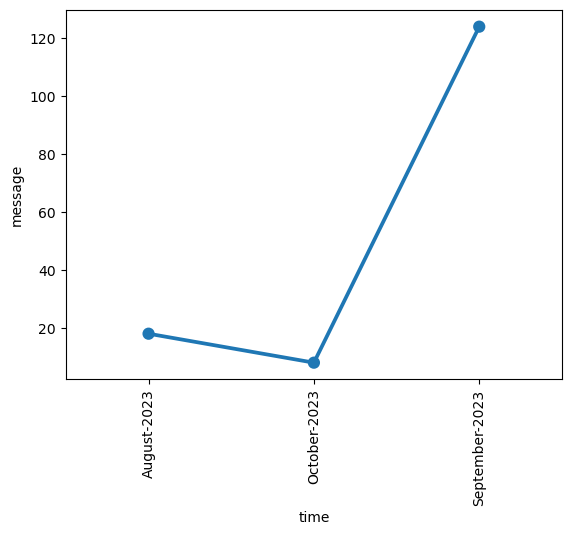

In [253]:
sns.pointplot(data=timeline, x='time', y='message')
plt.xticks(rotation='vertical')
plt.show()

## Daily timeline

In [254]:
df

,message_date,user,message,day,month,year,hour,minute,day_name,month_name
0,2023-08-12 09:01:00,Group_Notification,Messages and calls are end-to-end encrypted. N...,12,8,2023,9,1,Saturday,August
1,2023-08-21 13:51:00,Ajmer Sir CSE Dcrust,<Media omitted>\n,21,8,2023,13,51,Monday,August
2,2023-08-22 15:05:00,Ajmer Sir CSE Dcrust,,22,8,2023,15,5,Tuesday,August
3,2023-08-23 12:29:00,Ajmer Sir CSE Dcrust,<Media omitted>\n,23,8,2023,12,29,Wednesday,August
4,2023-08-23 12:59:00,Ajmer Sir CSE Dcrust,"If anyone is not in the list, let me know toda...",23,8,2023,12,59,Wednesday,August
...,...,...,...,...,...,...,...,...,...,...
145,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.qualcomm.com/careers/job/44669...,2,10,2023,20,44,Monday,October
146,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.mastercard.com/us/en/job/MASRU...,2,10,2023,20,44,Monday,October
147,2023-10-03 11:45:00,+91 89302 20999,It is intimated that the process to apply for ...,3,10,2023,11,45,Tuesday,October
148,2023-10-03 11:45:00,+91 89302 20999,<Media omitted>\n,3,10,2023,11,45,Tuesday,October


In [258]:
df['full_date'] = df['message_date'].dt.date
df.sample()

,message_date,user,message,day,month,year,hour,minute,day_name,month_name,full_date
97,2023-09-26 12:46:00,Rahul CSE Dcrust,Book your slots everyone. Be prepared with you...,26,9,2023,12,46,Tuesday,September,2023-09-26


In [263]:
daily_time = df.groupby(['full_date']).count()['message'].reset_index()
daily_time

,full_date,message
0,2023-08-12,1
1,2023-08-21,1
2,2023-08-22,1
3,2023-08-23,11
4,2023-08-25,2
5,2023-08-26,1
6,2023-08-29,1
7,2023-09-01,2
8,2023-09-04,18
9,2023-09-05,1


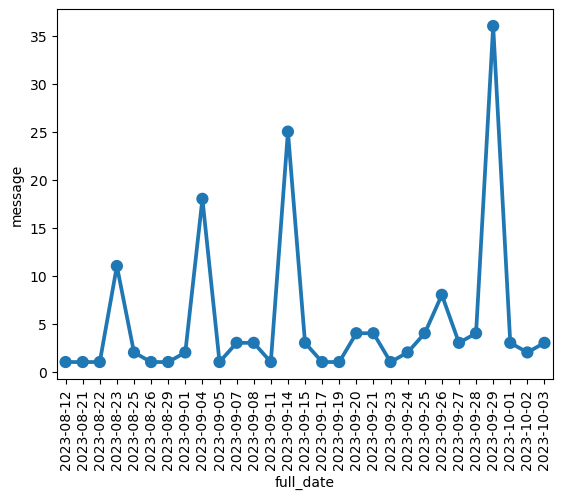

In [264]:
sns.pointplot(data=daily_time, x='full_date', y='message')
plt.xticks(rotation='vertical')
plt.show()

## Activity in Week

In [280]:
df

,message_date,user,message,day,month,year,hour,minute,day_name,month_name,full_date
0,2023-08-12 09:01:00,Group_Notification,Messages and calls are end-to-end encrypted. N...,12,8,2023,9,1,Saturday,August,2023-08-12
1,2023-08-21 13:51:00,Ajmer Sir CSE Dcrust,<Media omitted>\n,21,8,2023,13,51,Monday,August,2023-08-21
2,2023-08-22 15:05:00,Ajmer Sir CSE Dcrust,,22,8,2023,15,5,Tuesday,August,2023-08-22
3,2023-08-23 12:29:00,Ajmer Sir CSE Dcrust,<Media omitted>\n,23,8,2023,12,29,Wednesday,August,2023-08-23
4,2023-08-23 12:59:00,Ajmer Sir CSE Dcrust,"If anyone is not in the list, let me know toda...",23,8,2023,12,59,Wednesday,August,2023-08-23
...,...,...,...,...,...,...,...,...,...,...,...
145,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.qualcomm.com/careers/job/44669...,2,10,2023,20,44,Monday,October,2023-10-02
146,2023-10-02 20:44:00,Rahul CSE Dcrust,https://careers.mastercard.com/us/en/job/MASRU...,2,10,2023,20,44,Monday,October,2023-10-02
147,2023-10-03 11:45:00,+91 89302 20999,It is intimated that the process to apply for ...,3,10,2023,11,45,Tuesday,October,2023-10-03
148,2023-10-03 11:45:00,+91 89302 20999,<Media omitted>\n,3,10,2023,11,45,Tuesday,October,2023-10-03


In [274]:
df['day_name'].value_counts()

Friday       46
Thursday     36
Monday       26
Wednesday    18
Tuesday      15
Sunday        6
Saturday      3
Name: day_name, dtype: int64

In [279]:
active_week = df.groupby(['day_name']).count()['message'].reset_index()
active_week

,day_name,message
0,Friday,46
1,Monday,26
2,Saturday,3
3,Sunday,6
4,Thursday,36
5,Tuesday,15
6,Wednesday,18


In [281]:
df[['day_name','hour']]

,day_name,hour
0,Saturday,9
1,Monday,13
2,Tuesday,15
3,Wednesday,12
4,Wednesday,12
...,...,...
145,Monday,20
146,Monday,20
147,Tuesday,11
148,Tuesday,11


In [282]:
df[['day_name','hour']]['hour']

0       9
1      13
2      15
3      12
4      12
       ..
145    20
146    20
147    11
148    11
149    12
Name: hour, Length: 150, dtype: int64

In [287]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+'-'+str('00'))
    elif hour == 0:
        period.append(str('00')+'-'+str(hour+1))
    else:
        period.append(str(hour)+'-'+str(hour+1))

In [289]:
df['period'] = period
df.sample(4)

,message_date,user,message,day,month,year,hour,minute,day_name,month_name,full_date,period
134,2023-09-29 11:57:00,Ajmer Sir CSE Dcrust,1012\n,29,9,2023,11,57,Friday,September,2023-09-29,11-12
26,2023-09-04 10:02:00,+91 96259 87125,Saurav\n20001001104\n,4,9,2023,10,2,Monday,September,2023-09-04,10-11
80,2023-09-21 14:29:00,Ajmer Sir CSE Dcrust,<Media omitted>\n,21,9,2023,14,29,Thursday,September,2023-09-21,14-15
16,2023-08-26 10:47:00,Ajmer Sir CSE Dcrust,Anyone from Radaur here?\n,26,8,2023,10,47,Saturday,August,2023-08-26,10-11


In [313]:
pvt = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
pvt

period,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-00,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,
Friday,0.0,32.0,5.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Monday,10.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0
Saturday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Sunday,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Thursday,0.0,0.0,3.0,0.0,5.0,0.0,3.0,7.0,5.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,2.0
Tuesday,0.0,2.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
Wednesday,0.0,1.0,2.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0


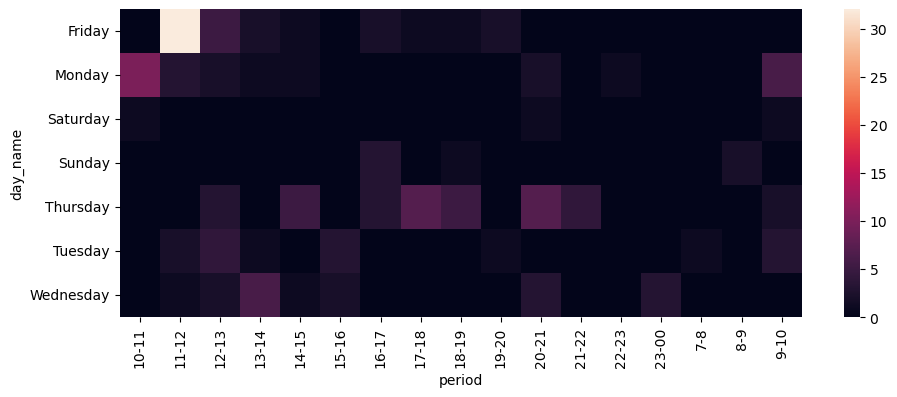

In [315]:
plt.figure(figsize=(11,4))
sns.heatmap(pvt)
plt.xticks(rotation='vertical')
plt.show()